In [50]:
import scipy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

# Caso simbolico

En este caso hay dos opciones
1. La integral puede ser resuelta analiticamente $\int f(x)dx=$ 
2. La integral no puede ser resuelto analiticamente
podemos intentarc con sympy primero para si la integral puede ser resuelta analiticamente
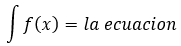

## Parte 1: Resolver

**Ejemplo:** Encuentre $\int \sin^3(x) e^{-5x} dx$

In [51]:
x = smp.symbols('x', real=True)
f = smp.sin(x)**3 * smp.exp(-5*x)

In [52]:
smp.integrate(f, x)

-40*exp(-5*x)*sin(x)**3/221 - 21*exp(-5*x)*sin(x)**2*cos(x)/221 - 15*exp(-5*x)*sin(x)*cos(x)**2/442 - 3*exp(-5*x)*cos(x)**3/442

**Ejemplo:** $\int \cos(bx)e^{-ax}dx$ 

In [53]:
a, b = smp.symbols('a b', real=True, positive=True)
f = smp.cos(b*x) * smp.exp(-a*x)

In [54]:
smp.integrate(f, x).simplify()

(-a*cos(b*x) + b*sin(b*x))*exp(-a*x)/(a**2 + b**2)

**Ejemplo:** $\int \frac{(1+\sqrt{x})^{1/3}}{\sqrt{x}}dx$

In [55]:
f = (1+smp.sqrt(x))**smp.Rational(1,3) / smp.sqrt(x)
smp.integrate(f,x).simplify()

3*(sqrt(x) + 1)**(4/3)/2

**Ejemplo:** Define: $\int_{0}^{\ln(4)} \frac{e^{x}}{\sqrt{e^{2x}+9}} dx$

In [56]:
f = smp.exp(x) / smp.sqrt(smp.exp(2*x)+9)
smp.integrate(f, (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

*Ejemplo:* (incorrecto) $\int_{0}^{\infty} \frac{16 \tan^{-1}(x)}{1+x^2} dx$

In [57]:
f = 16*smp.atan(x) / (1+x**2)
smp.integrate(f, (x, 0, smp.oo))

2*pi**2

## Parte 2: Integrales sin solucion

**Ejemplo:** $\int_{1}^{2} {e^{-\sin(x)}}dx$

No correra

In [58]:
#f = smp.exp(-smp.sin(x))
#smp.integrate(f, (x, 1 ,2)).simplify()

Usamos la funcion `quad` de scipy para integrar numericamente

In [59]:
f = lambda x: np.exp(-np.sin(x))

In [60]:
f = lambda x: np.exp(-np.sin(x))
quad(f, 1, 2)

C:\Users\rossb\AppData\Local\Temp\ipykernel_13596\870613783.py:1: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  f = lambda x: np.exp(-np.sin(x))
C:\Users\rossb\AppData\Local\Temp\ipykernel_13596\870613783.py:1: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  f = lambda x: np.exp(-np.sin(x))


(0.3845918142796868, 4.2698268729567035e-15)

**Ejemplo:** $ \int_{0}^{2\pi} \frac{1}{(a-\cos(x))^{2}+(b-\sin(x))^2} dx$

In [ ]:
#f = 1/((a-smp.cos(x))**2 + (b-smp.sin(x))**2)
#smp.integrate(f, (x, 0, 2*smp.pi)).simplify()

In [62]:
f = lambda x: 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)
a, b = 2, 3
quad(f, 0, 2*np.pi)

C:\Users\rossb\AppData\Local\Temp\ipykernel_13596\1297007201.py:1: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  f = lambda x: 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)
C:\Users\rossb\AppData\Local\Temp\ipykernel_13596\1297007201.py:1: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  f = lambda x: 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)


(0.5235987755982989, 1.9168824822309832e-13)

Esto no se ejecutara porque no tiene una solucion analitica. Debemos resolverlo numericamente y por lo tanto, debemos elegir valores de $a$ y $b$ cada vez

# Caso numerico
En este caso donde uno recopila datos reales y quiere encontrar la integral

**Ejemplo:**: Pulsos electricos en fisica de particulas

**Example:** Datos de covid